In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(seed=10)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (4,4)

## Creación y graficación de Base de Datos sintética

In [2]:
nu = 200
C1 = np.random.randn(nu,2)
C2 = np.random.randn(nu-5,2)+[3,3]

X = np.vstack((C1,C2))
y = np.vstack((np.zeros((nu,1)),np.ones((nu-5,1))))
print(X.shape)
print(y.shape)
print(y.squeeze().shape)

(395, 2)
(395, 1)
(395,)


<IPython.core.display.Javascript object>


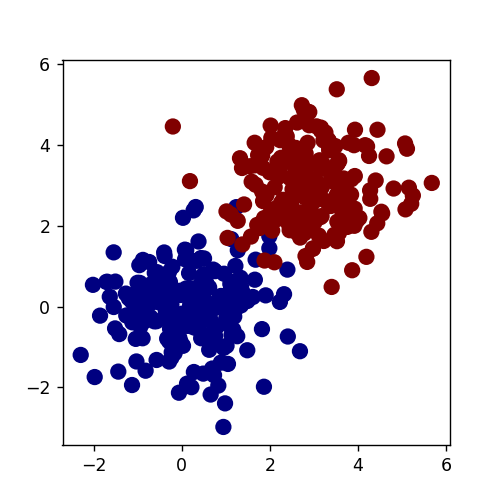

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X[:,0],X[:,1],s=70,c=y.squeeze(),cmap='jet')

In [4]:
def funDistancia(X,x_new):
    return np.sqrt(np.sum((X-x_new)**2,axis=1))

In [5]:
from scipy import stats

def IAW_knn(X,y,K,Xnew):
    distancia = funDistancia(X,Xnew)
    I = np.argsort(distancia)
    Ke = y[I[:K]]
    #print(Ke)
    
    return stats.mode(Ke).mode

## Clasificar un dato nuevo

<IPython.core.display.Javascript object>


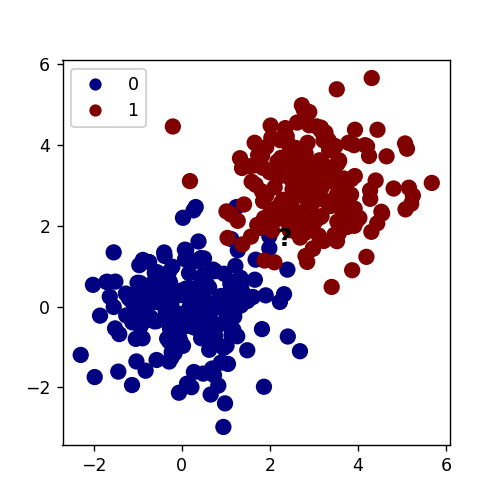

array([[0.]])

In [6]:
from matplotlib.font_manager import FontProperties


punto = np.array([2.16,1.502])

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

scatter = ax.scatter(X[:,0],X[:,1],s=70,c=y.squeeze(),cmap='jet')
legend1 = ax.legend(*scatter.legend_elements(num=1))
ax.add_artist(legend1)
font = FontProperties()
font.set_weight('bold')
font.set_size('x-large')
ax.text(punto[0], punto[1],'?',fontproperties=font)

K = 1
IAW_knn(X,y,K,punto)

## Graficar Fronteras de decisión

In [7]:
import ipywidgets as widgets
slider = widgets.IntSlider(
    min=1,
    max=395,
    step=2,
    description='Slider:',
    value=100,
    continuous_update=False)


In [8]:
def graficarFrontera(K):  
    K = K['new']
    print(f"Valor de K:{K}")
    xrange = [-3, 6]
    yrange = xrange
    reso = 200

    [XX,YY] = np.meshgrid(np.linspace(xrange[0],xrange[1],reso),np.linspace(yrange[0],yrange[1],reso))
    xy = np.vstack((YY.flatten(),XX.flatten()))
    xy = xy.T

#     K = 1

    b = np.zeros(xy.shape[0])
    for i in range(xy.shape[0]):
        #IAW_knn(X,y,1,xy[i,:])
        b[i] = IAW_knn(X,y,K,xy[i,:])

    dm = np.reshape(b,(reso,reso),order='F')
    
#     try:
#         fig.clf()
#     except:
#         fig = plt.figure(figsize=(4, 4))
#     ax = fig.add_subplot(111)
#     ax.cla()
    ax.set_title(f"Frontera de decisión para {K} vecino(s)")
    ax.scatter(X[:,0],X[:,1],s=50,c=y.squeeze(),cmap='jet')
    ax.imshow(dm, extent=[xrange[0], xrange[1], yrange[0], yrange[1]],alpha=0.4,origin='lower')

<IPython.core.display.Javascript object>


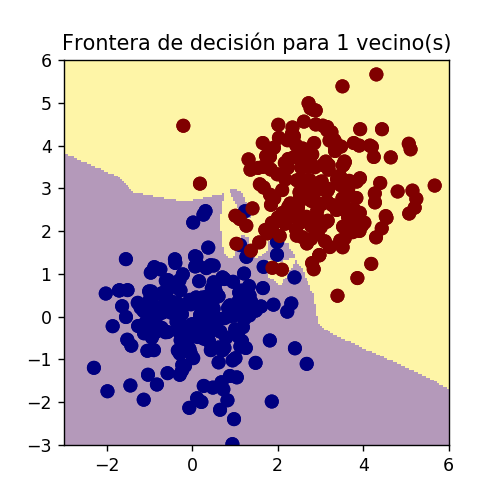

In [9]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.scatter(X[:,0],X[:,1],s=50,c=y.squeeze(),cmap='jet')

In [10]:
display(slider)
slider.observe(graficarFrontera, names='value')

IntSlider(value=100, continuous_update=False, description='Slider:', max=395, min=1, step=2)

Valor de K:1
Valor de K:25


In [11]:
np.sqrt(700**2 + 10**2 + 45**2)

701.5162150656248